# Aprendizaje Automatico

Hay dos categorias: Supervisada o No-Supervisadas.

## Supervisado

Tenemos datos objetivo de tal forma que la máquina pueda aprender con base a los casos existentes y así realizar predicciones

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets #Dataset de Ejemplos
from sklearn.neighbors import KNeighborsClassifier #Clasificador de Knn

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

# Iris

Este dataset tiene información de flores Iris de la longitud y ancho del cepalo, el targer corresponde al conjunto de objetivos, donde indica que si es 0 es setosa, soi es 1 es versicolor y si es 2 es virginica. Luego indica que hay 150 datos, 50 para cada clase de la flor y tenemos 4 variables que nos puede definir la clase de flor

In [2]:
iris = datasets.load_iris()
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [3]:
iris_predictores = iris.data #Cuales son las 4 medidas que tiene (Variables)
iris_objetivos = iris.target #El resultado (La clase de flor Iris que es)

In [4]:
print(iris_objetivos) 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


> Esto indica ue los primeros valores son setosa, los siguiente 50 son versicolor y los 50 restantes son Virginica

Es nesario desordenar el arreglo para que la máquina aprenda lo que el botanico puede establecer segun los valores predictores, lo que haremos es cojer 140 datos para el algoritmo y vamos a predecir los otros 10. De esta manera podemos verificar el algoritmo

In [5]:
np.random.seed(0)
#Creamos un arreglo de indices que permite una permutación aleatoria del tamaño de predictores, desordena el arreglo
indices = np.random.permutation(len(iris_predictores))
print(indices)

[114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83  61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80
 123 133 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95
  20  15  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110
 124  41 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28
  55  75  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49
 136  99  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36
  21   9 103  67 117  47]


In [6]:
iris_predictores_train = iris_predictores[indices[:-10]]
iris_objetivos_train = iris_objetivos[indices[:-10]]

In [7]:
iris_predictores_test = iris_predictores[indices[-10:]]
iris_objetivos_test = iris_objetivos[indices[-10:]]

Luego de desordenar los datos, ahora si vamos a entrenar el algoritmo que sera Knn Vecinos y lo vamos a verificar. 

### Clasificador de Vecinos

Esto se hace con la herramienta mágica, realizando la clasificación de vecinos con los datos predictores y los datos objetivos que tiene los 140 datos que nos va permitir entrenar el modelo.

In [8]:
knn = KNeighborsClassifier()
knn.fit(iris_predictores_train, iris_objetivos_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Ahora vamos a imprimir los algoritmos de prueba y lo que el modelo predijo para poder verificar si el modelo es válido para los datos

In [9]:
print(knn.predict(iris_predictores_test))
print(iris_objetivos_test)

[1 2 1 0 0 0 2 1 2 0]
[1 1 1 0 0 0 2 1 2 0]


> Podemos ver que el modelo tiene una precisión del 90%, ya que predijo correctamente 9 de 10. Ahora si podemos realizar el modelamiento con todos los datos

In [10]:
iris_predictores_train = iris_predictores[indices]
iris_objetivos_train = iris_objetivos[indices]
knn.fit(iris_predictores_train, iris_objetivos_train)

mi_lectura_pred=[[1,2,8,1], [3,2,1,4], [1,5,3,5]]
mi_lectura_obj= knn.predict(mi_lectura_pred)
print(mi_lectura_obj)

[2 0 1]


## Clasificación NO supervisada 

Se pueden utilizar un algortimo de arbol de decisión, pero en este caso vamos a utilizar el algoritmo de K-medias.

En este algortimo, aparece el término de Inercia, sumatoria de las puntos en el centro del conjunto de los datos, 

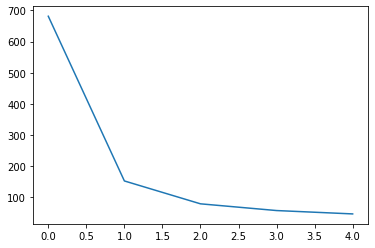

In [11]:
Error = []
for i in range(1, 6):
    kmedias = KMeans(n_clusters = i).fit(iris_predictores)
    Error.append(kmedias.inertia_) 
plt.plot(Error)

> En esta grafica podemos ver que la inercia disminuye a medida que vamos aumentando el número de cluster o centros

In [12]:
kmedias = KMeans(n_clusters=3).fit(iris_predictores)
predicciones = kmedias.fit_predict(iris_predictores)

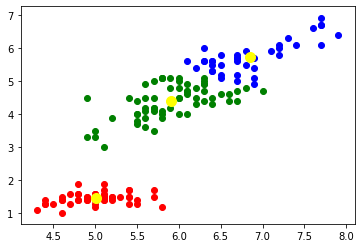

In [13]:
plt.scatter(iris_predictores[:,0][predicciones==0], iris_predictores[:,2][predicciones==0],c='red')
plt.scatter(iris_predictores[:,0][predicciones==1], iris_predictores[:,2][predicciones==1],c='green')
plt.scatter(iris_predictores[:,0][predicciones==2], iris_predictores[:,2][predicciones==2],c='blue')
plt.scatter(kmedias.cluster_centers_[:, 0], kmedias.cluster_centers_[:, 2], s=100, c='yellow') # Centroides

> Esta grafica nos muestra la clasificación no supervisada con tres centros 

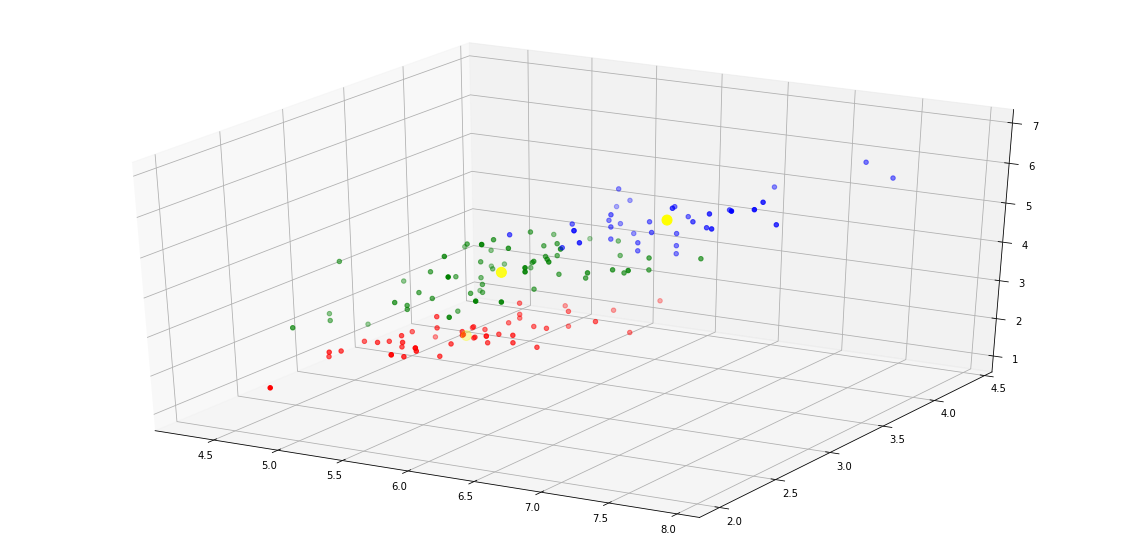

In [14]:
fig = plt.figure(figsize=(20, 10))
fig3d = fig.add_subplot(1, 1, 1, projection="3d")

fig3d.scatter(iris_predictores[:, 0][predicciones==1], iris_predictores[:, 1][predicciones==1], iris_predictores[:, 2][predicciones==1], c='green')
fig3d.scatter(iris_predictores[:, 0][predicciones==0], iris_predictores[:, 1][predicciones==0], iris_predictores[:, 2][predicciones==0], c='red')
fig3d.scatter(iris_predictores[:, 0][predicciones==2], iris_predictores[:, 1][predicciones==2], iris_predictores[:, 2][predicciones==2], c='blue')
fig3d.scatter(kmedias.cluster_centers_[:, 0], kmedias.cluster_centers_[:, 1], kmedias.cluster_centers_[:, 2], s=100, c='yellow') # Centroides